In [2]:
import pandas as pd

In [16]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Function to process, clean, and pivot each dataframe
def process_and_pivot(df, prefix):
    # Fill missing numeric values with the mean and categorical values with "Not Available"
    df.fillna(df.mean(numeric_only=True), inplace=True)
    df.fillna("Not Available", inplace=True)
    
    # Filter the relevant columns: 'Location', 'Period', and 'Value'
    df_filtered = df[['Location', 'Period', 'Value']]

    # Pivot the DataFrame so that 'Period' (Year) becomes the columns
    df_pivoted = df_filtered.pivot(index='Location', columns='Period', values='Value')

    # Rename the columns to have the specified prefix
    df_pivoted = df_pivoted.rename(columns=lambda x: f"{prefix}_{x}")

    return df_pivoted.reset_index()

# Load the datasets
advertisingBan = pd.read_csv('../data/advertising_ban_internet.csv')
affordability = pd.read_csv('../data/affordability.csv')
gdp2000Cigs = pd.read_csv('../data/gdp_for_2000_cigs.csv')
healthWarningPhoto = pd.read_csv('../data/health_warning_photo.csv')
requiredHealthWarnings = pd.read_csv('../data/required_health_warning.csv')

# Process and pivot each dataframe
advertisingBan_pivoted = process_and_pivot(advertisingBan, 'advertisingBan')
affordability_pivoted = process_and_pivot(affordability, 'affordability')
gdp2000Cigs_pivoted = process_and_pivot(gdp2000Cigs, 'gdp2000Cigs')
healthWarningPhoto_pivoted = process_and_pivot(healthWarningPhoto, 'healthWarningPhoto')
requiredHealthWarnings_pivoted = process_and_pivot(requiredHealthWarnings, 'requiredHealthWarnings')

# Merge the pivoted dataframes on 'Location'
combined_df = advertisingBan_pivoted.merge(affordability_pivoted, on='Location', how='outer')
combined_df = combined_df.merge(gdp2000Cigs_pivoted, on='Location', how='outer')
combined_df = combined_df.merge(healthWarningPhoto_pivoted, on='Location', how='outer')
combined_df = combined_df.merge(requiredHealthWarnings_pivoted, on='Location', how='outer')

# Drop 'Location' for clustering and handle missing values again
data_for_clustering = combined_df.drop(columns=['Location'])

# Use a pipeline to handle missing values, encode categorical data, and scale the data
numeric_features = data_for_clustering.select_dtypes(include=['float64', 'int64']).columns
categorical_features = data_for_clustering.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Prepare the final data for clustering
clustering_data = preprocessor.fit_transform(data_for_clustering)

# Now `clustering_data` is ready for clustering algorithms
clustering_data = pd.DataFrame(clustering_data)
clustering_data.to_csv('../processed_data/processed_data2.csv', index=False)

In [13]:
import pandas as pd

# Function to process and pivot each dataframe
def process_and_pivot(df, prefix):
    df_filtered = df[['Location', 'Period', 'Value']]
    df.fillna(df.mean(numeric_only=True), inplace=True)
    df_pivoted = df_filtered.pivot(index='Location', columns='Period', values='Value')

    df_pivoted = df_pivoted.rename(columns=lambda x: f"{prefix}_{x}")

    return df_pivoted.reset_index()

# Load the datasets
advertisingBan = pd.read_csv('../data/advertising_ban_internet.csv')
affordability = pd.read_csv('../data/affordability.csv')
#ageStandardized = pd.read_csv('../data/age_stand.csv')
gdp2000Cigs = pd.read_csv('../data/gdp_for_2000_cigs.csv')
healthWarningPhoto = pd.read_csv('../data/health_warning_photo.csv')
requiredHealthWarnings = pd.read_csv('../data/required_health_warning.csv')

# Process and pivot each dataframe
advertisingBan_pivoted = process_and_pivot(advertisingBan, 'advertisingBan')
affordability_pivoted = process_and_pivot(affordability, 'affordability')
#ageStandardized_pivoted = process_and_pivot(ageStandardized, 'ageStandardized')
gdp2000Cigs_pivoted = process_and_pivot(gdp2000Cigs, 'gdp2000Cigs')
healthWarningPhoto_pivoted = process_and_pivot(healthWarningPhoto, 'healthWarningPhoto')
requiredHealthWarnings_pivoted = process_and_pivot(requiredHealthWarnings, 'requiredHealthWarnings')

# Merge the pivoted dataframes on 'Location'
combined_df = advertisingBan_pivoted.merge(affordability_pivoted, on='Location', how='outer')
#combined_df = combined_df.merge(ageStandardized_pivoted, on='Location', how='outer')
combined_df = combined_df.merge(gdp2000Cigs_pivoted, on='Location', how='outer')
combined_df = combined_df.merge(healthWarningPhoto_pivoted, on='Location', how='outer')
combined_df = combined_df.merge(requiredHealthWarnings_pivoted, on='Location', how='outer')

# Inspect the combined dataframe
combined_df.to_csv('../processed_data/processed_data.csv', index=False)
combined_df

Period,Location,advertisingBan_2007,advertisingBan_2008,advertisingBan_2010,advertisingBan_2012,advertisingBan_2014,advertisingBan_2016,advertisingBan_2018,advertisingBan_2020,advertisingBan_2022,...,healthWarningPhoto_2022,requiredHealthWarnings_2007,requiredHealthWarnings_2008,requiredHealthWarnings_2010,requiredHealthWarnings_2012,requiredHealthWarnings_2014,requiredHealthWarnings_2016,requiredHealthWarnings_2018,requiredHealthWarnings_2020,requiredHealthWarnings_2022
0,Afghanistan,No,No,No,No,No,Yes,Yes,Yes,Yes,...,No,No,No,No,No,No,Yes,Yes,Yes,Yes
1,Albania,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
2,Algeria,No,No,No,No,No,No,Yes,Yes,Yes,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
3,Andorra,No,No,No,No,No,No,No,No,No,...,Not applicable,No,No,No,No,No,No,No,No,No
4,Angola,No,No,No,No,No,No,No,No,No,...,Not applicable,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Viet Nam,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
191,Yemen,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
192,Zambia,No,No,No,No,No,No,No,No,No,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
193,Zimbabwe,No,No,No,No,No,No,No,No,No,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes


/home/nilspersson/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


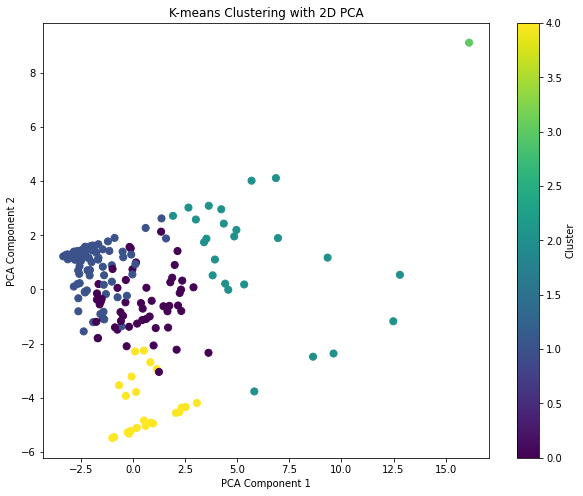

In [18]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Function to process and pivot each dataframe
def process_and_pivot(df, prefix):
    df.fillna(df.mean(numeric_only=True), inplace=True)
    df.fillna("Not Available", inplace=True)
    
    df_filtered = df[['Location', 'Period', 'Value']]
    df_pivoted = df_filtered.pivot(index='Location', columns='Period', values='Value')
    df_pivoted = df_pivoted.rename(columns=lambda x: f"{prefix}_{x}")
    
    return df_pivoted.reset_index()

# Load the datasets
advertisingBan = pd.read_csv('../data/advertising_ban_internet.csv')
affordability = pd.read_csv('../data/affordability.csv')
gdp2000Cigs = pd.read_csv('../data/gdp_for_2000_cigs.csv')
healthWarningPhoto = pd.read_csv('../data/health_warning_photo.csv')
requiredHealthWarnings = pd.read_csv('../data/required_health_warning.csv')

# Process and pivot each dataframe
advertisingBan_pivoted = process_and_pivot(advertisingBan, 'advertisingBan')
affordability_pivoted = process_and_pivot(affordability, 'affordability')
gdp2000Cigs_pivoted = process_and_pivot(gdp2000Cigs, 'gdp2000Cigs')
healthWarningPhoto_pivoted = process_and_pivot(healthWarningPhoto, 'healthWarningPhoto')
requiredHealthWarnings_pivoted = process_and_pivot(requiredHealthWarnings, 'requiredHealthWarnings')

# Merge the pivoted dataframes on 'Location'
combined_df = advertisingBan_pivoted.merge(affordability_pivoted, on='Location', how='outer')
combined_df = combined_df.merge(gdp2000Cigs_pivoted, on='Location', how='outer')
combined_df = combined_df.merge(healthWarningPhoto_pivoted, on='Location', how='outer')
combined_df = combined_df.merge(requiredHealthWarnings_pivoted, on='Location', how='outer')

# Drop 'Location' for clustering
data_for_clustering = combined_df.drop(columns=['Location'])

# Preprocessing pipeline: imputing, encoding, and scaling
numeric_features = data_for_clustering.select_dtypes(include=['float64', 'int64']).columns
categorical_features = data_for_clustering.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Prepare the final data for clustering
clustering_data = preprocessor.fit_transform(data_for_clustering)

# Apply K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(clustering_data)

# Assign cluster labels to the original data
combined_df['Cluster'] = kmeans.labels_

# Use PCA to reduce data to 2D for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(clustering_data)


# Find one representative country for each cluster
representative_countries = combined_df.groupby('Cluster')['Location'].first()

# Create a scatter plot of the clusters with one country labeled per cluster
plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_components[:, 0], pca_components[:, 1], c=kmeans.labels_, cmap='viridis', s=50)

# Label one country per cluster
for cluster, country in representative_countries.items():
    idx = combined_df[combined_df['Location'] == country].index[0]
    plt.text(pca_components[idx, 0], pca_components[idx, 1], country, fontsize=12, weight='bold')

plt.title('K-means Clustering with 2D PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

